Welcome!

This notebook contains Machine Learning Pet Project on Wine Dataset - a **Multiclass Classification** problem. Enjoy!

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Wine Dataset

The Wine dataset contains results of a chemical analysis of wines grown in the same region in Italy but derived from **three different cultivars** (grape varieties).

**13 Features:**

1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

**Target Variable (3 Classes):**
- Class 0: Cultivar 1 (59 samples)
- Class 1: Cultivar 2 (71 samples)
- Class 2: Cultivar 3 (48 samples)

## Data Loading

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
print(f"Dataset shape: {df.shape}")
print(f"Number of classes: {len(data.target_names)}")
print(f"\nFeature names: {data.feature_names}")
print(f"\nTarget names: {data.target_names}")

Dataset shape: (178, 14)
Number of classes: 3

Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Target names: ['class_0' 'class_1' 'class_2']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [5]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## Data Cleaning

### Missing Values

In [6]:
print("Missing values per column:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Missing values per column:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

Total missing values: 0


### Outliers Detection

In [7]:
def detect_outliers_iqr(dataframe, feature):
    Q1 = dataframe[feature].quantile(0.25)
    Q3 = dataframe[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = dataframe[(dataframe[feature] < lower_bound) | (dataframe[feature] > upper_bound)]
    return len(outliers)

# Check outliers for numerical features
outlier_counts = {}
for col in df.columns[:-1]:  # Exclude target
    outlier_counts[col] = detect_outliers_iqr(df, col)

outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
print("Outliers per feature:")
outlier_df[outlier_df['Outlier Count'] > 0].sort_values('Outlier Count', ascending=False)

Outliers per feature:


,Outlier Count
alcalinity_of_ash,4
color_intensity,4
magnesium,4
ash,3
malic_acid,3
proanthocyanins,2
hue,1


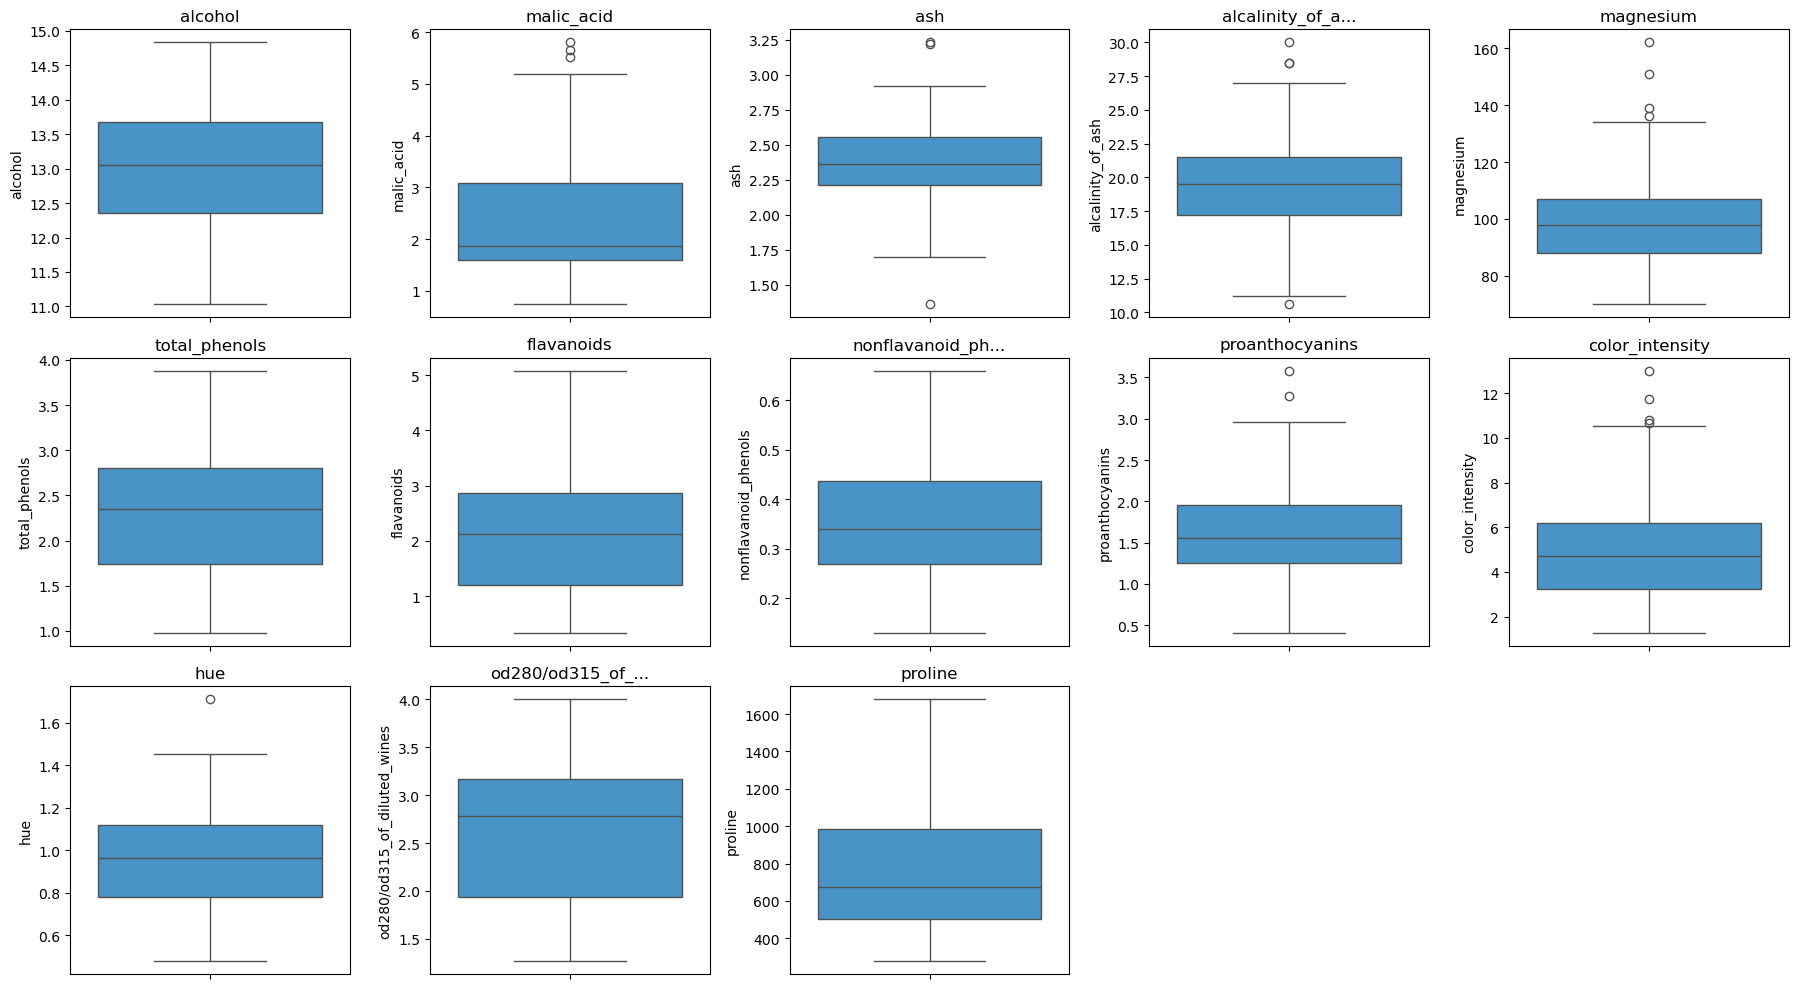

In [8]:
# Visualize outliers with boxplots
fig, axes = plt.subplots(3, 5, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(df.columns[:-1]):
    sns.boxplot(data=df, y=col, ax=axes[idx], color='#3498db')
    axes[idx].set_title(col[:15] + '...' if len(col) > 15 else col)

# Hide empty subplots
for idx in range(len(df.columns)-1, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

## Exploratory Data Analysis

### Target Distribution (Multiclass)

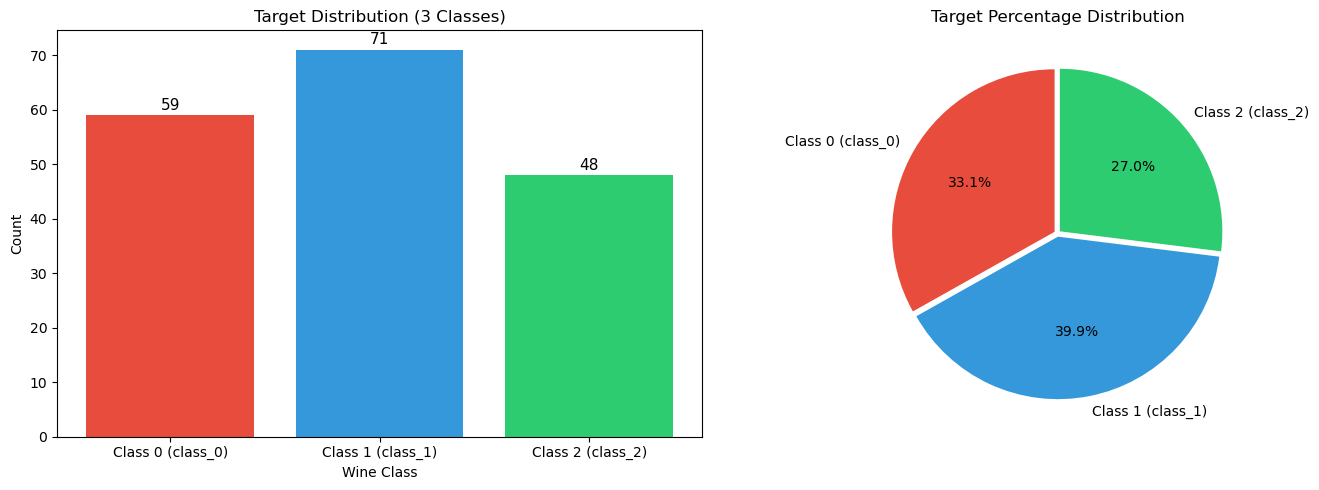

Class Distribution:
  Class 0 (class_0): 59 samples (33.1%)
  Class 1 (class_1): 71 samples (39.9%)
  Class 2 (class_2): 48 samples (27.0%)


In [9]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
target_counts = df['target'].value_counts().sort_index()
colors = ['#e74c3c', '#3498db', '#2ecc71']
class_labels = [f'Class {i} ({data.target_names[i]})' for i in range(3)]

bars = ax[0].bar(class_labels, target_counts.values, color=colors)
ax[0].set_title('Target Distribution (3 Classes)', fontsize=12)
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Wine Class')

# Add count labels on bars
for bar, count in zip(bars, target_counts.values):
    ax[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
               str(count), ha='center', fontsize=11)

# Pie chart
ax[1].pie(target_counts, labels=class_labels, autopct='%1.1f%%', 
          colors=colors, startangle=90, explode=[0.02]*3)
ax[1].set_title('Target Percentage Distribution', fontsize=12)

plt.tight_layout()
plt.show()

print("Class Distribution:")
for i in range(3):
    print(f"  Class {i} ({data.target_names[i]}): {target_counts[i]} samples ({target_counts[i]/len(df)*100:.1f}%)")

### Feature Distributions by Class

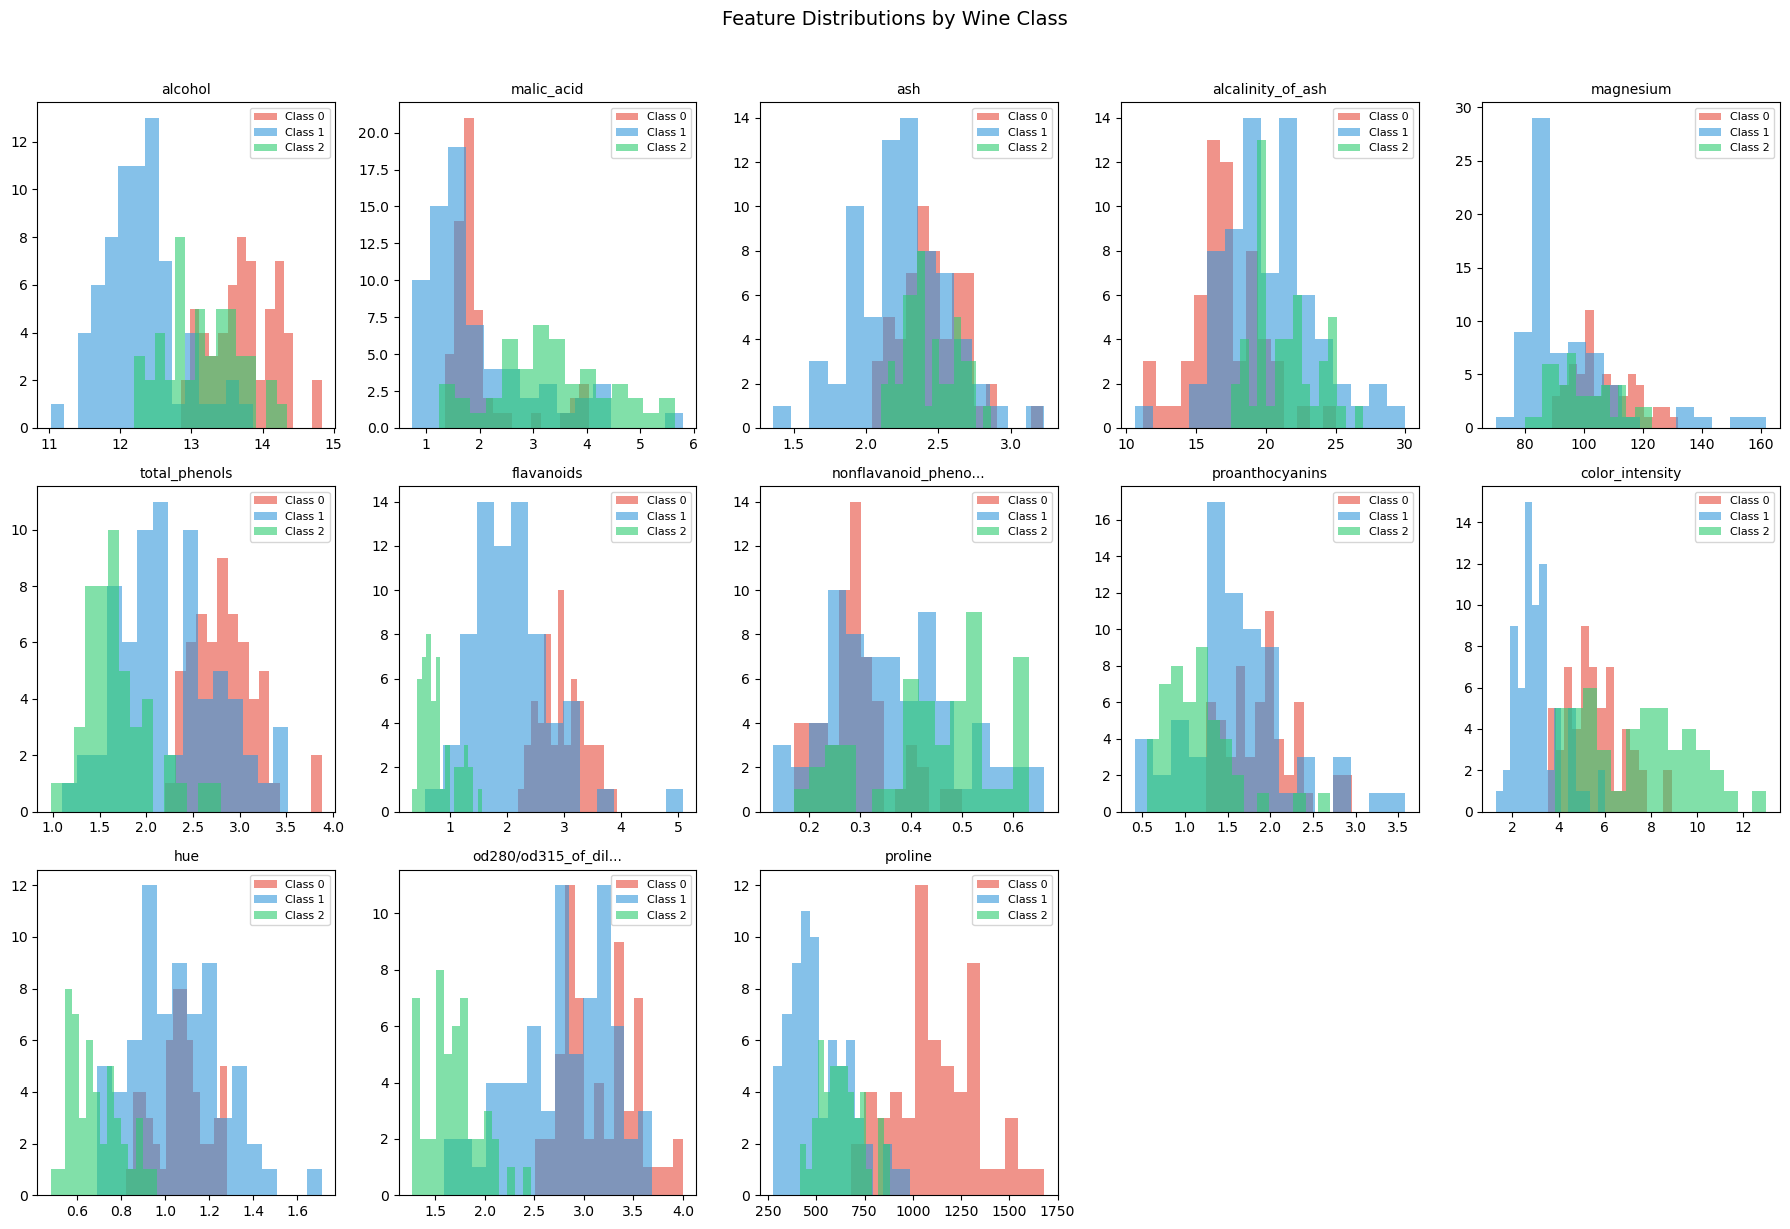

In [10]:
fig, axes = plt.subplots(3, 5, figsize=(18, 12))
axes = axes.flatten()

colors = ['#e74c3c', '#3498db', '#2ecc71']

for idx, feature in enumerate(df.columns[:-1]):
    for class_val in range(3):
        subset = df[df['target'] == class_val][feature]
        axes[idx].hist(subset, alpha=0.6, label=f'Class {class_val}', 
                       color=colors[class_val], bins=15)
    axes[idx].set_title(feature[:18] + '...' if len(feature) > 18 else feature, fontsize=10)
    axes[idx].legend(fontsize=8)

# Hide empty subplots
for idx in range(len(df.columns)-1, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Feature Distributions by Wine Class', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

### Box Plots by Target Class

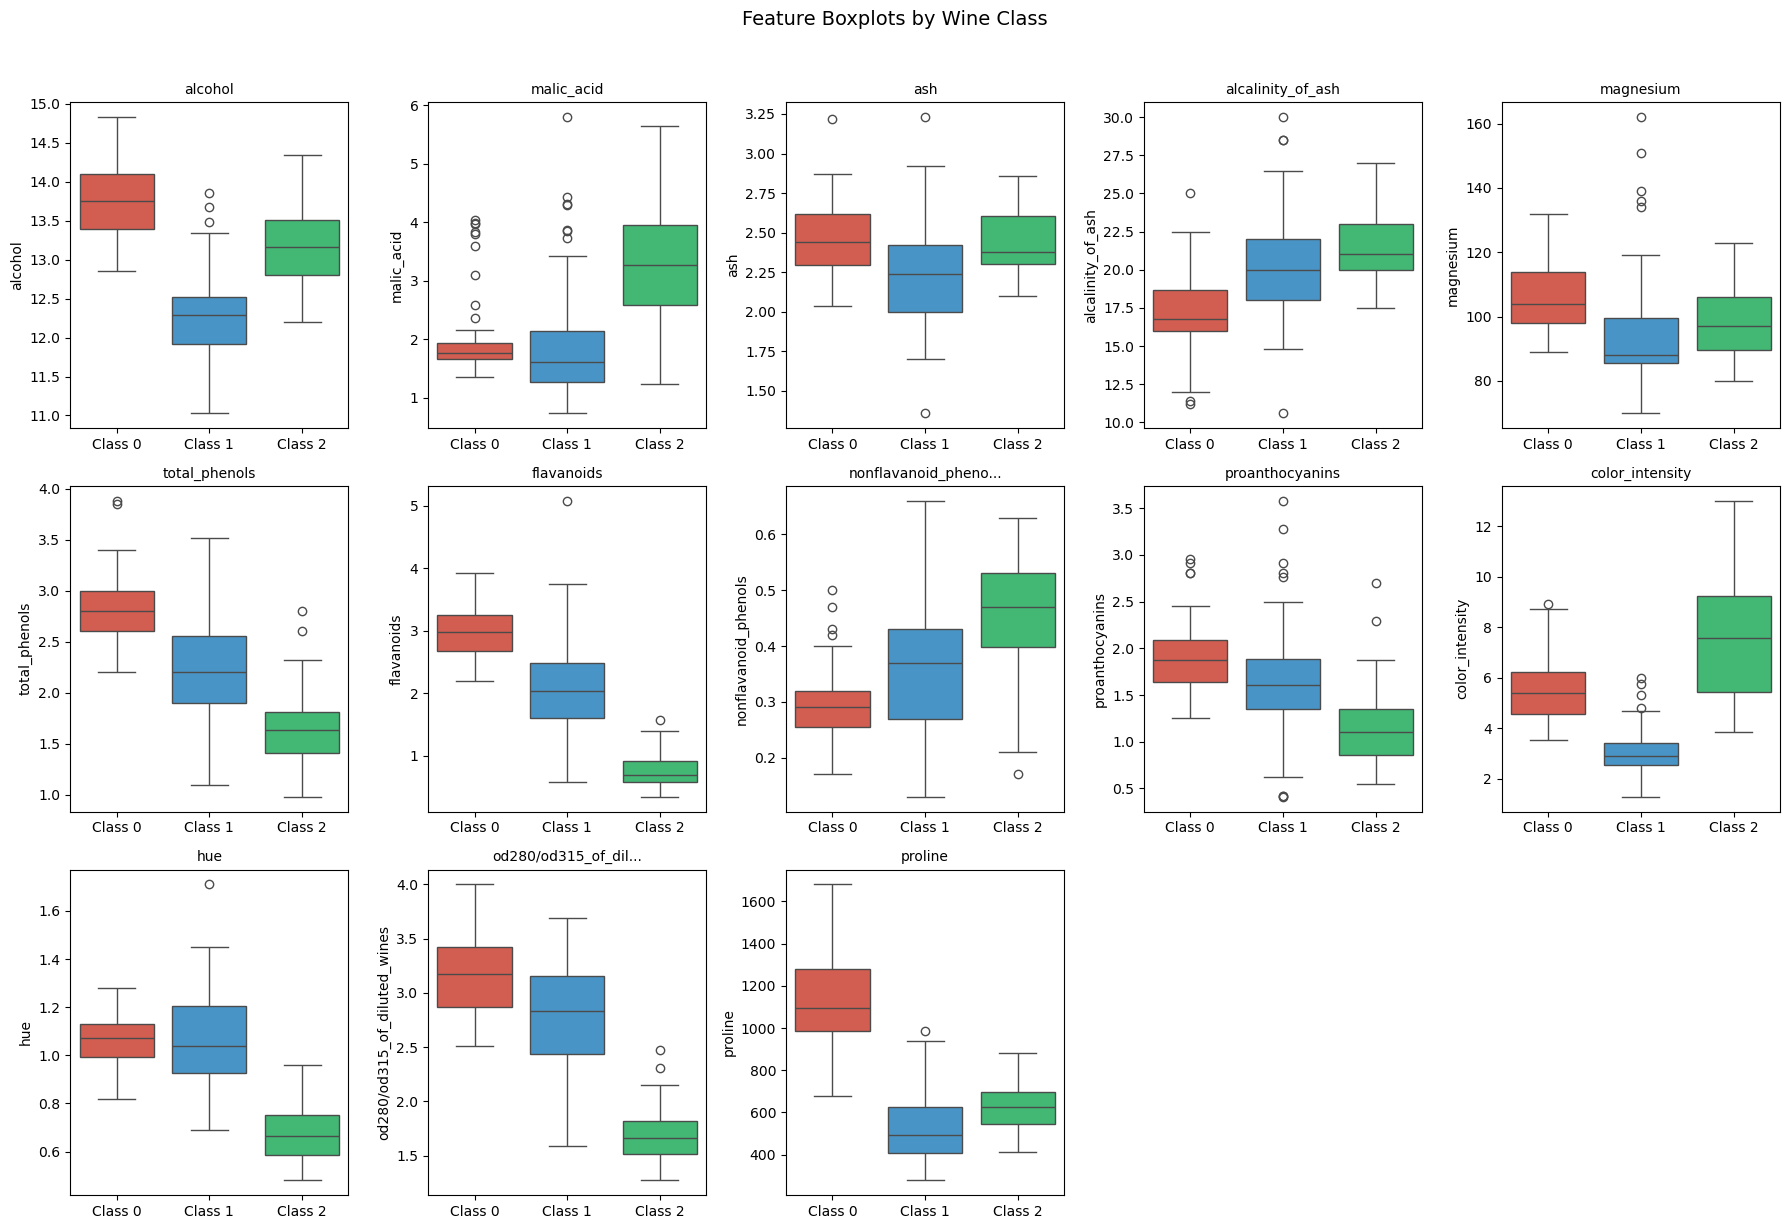

In [11]:
fig, axes = plt.subplots(3, 5, figsize=(18, 12))
axes = axes.flatten()

for idx, feature in enumerate(df.columns[:-1]):
    sns.boxplot(data=df, x='target', y=feature, ax=axes[idx], 
                palette=['#e74c3c', '#3498db', '#2ecc71'])
    axes[idx].set_title(feature[:18] + '...' if len(feature) > 18 else feature, fontsize=10)
    axes[idx].set_xlabel('')
    axes[idx].set_xticklabels(['Class 0', 'Class 1', 'Class 2'])

# Hide empty subplots
for idx in range(len(df.columns)-1, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Feature Boxplots by Wine Class', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

### Correlation Analysis

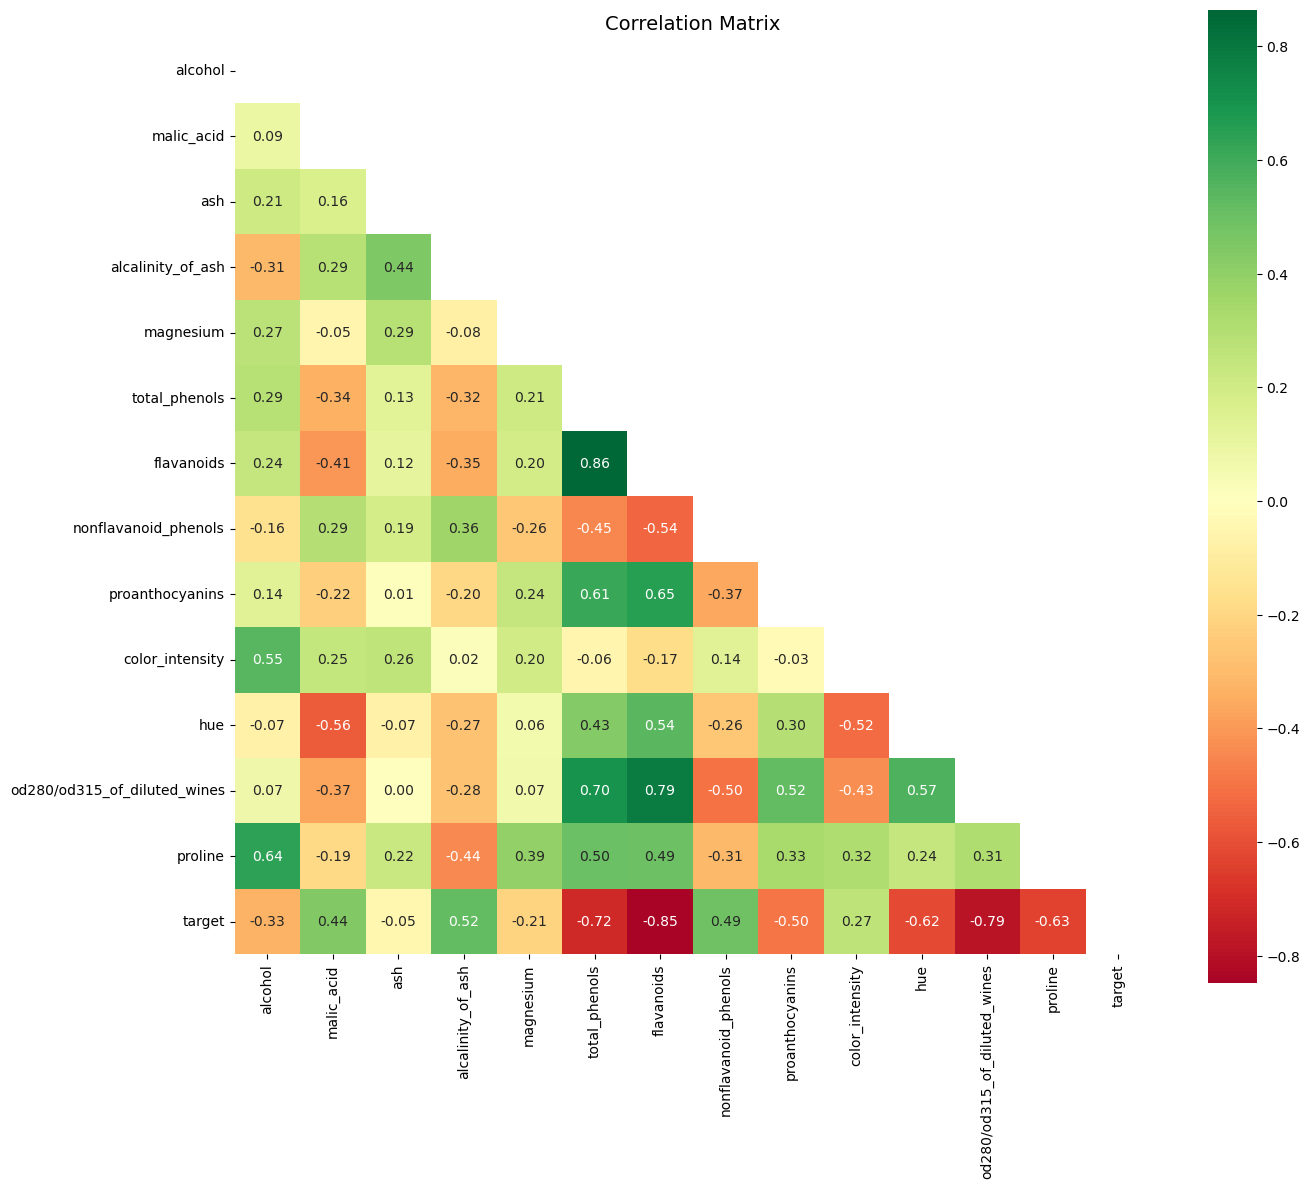

In [12]:
# Full correlation matrix
plt.figure(figsize=(14, 12))
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', center=0, 
            fmt='.2f', mask=mask, square=True)
plt.title('Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()

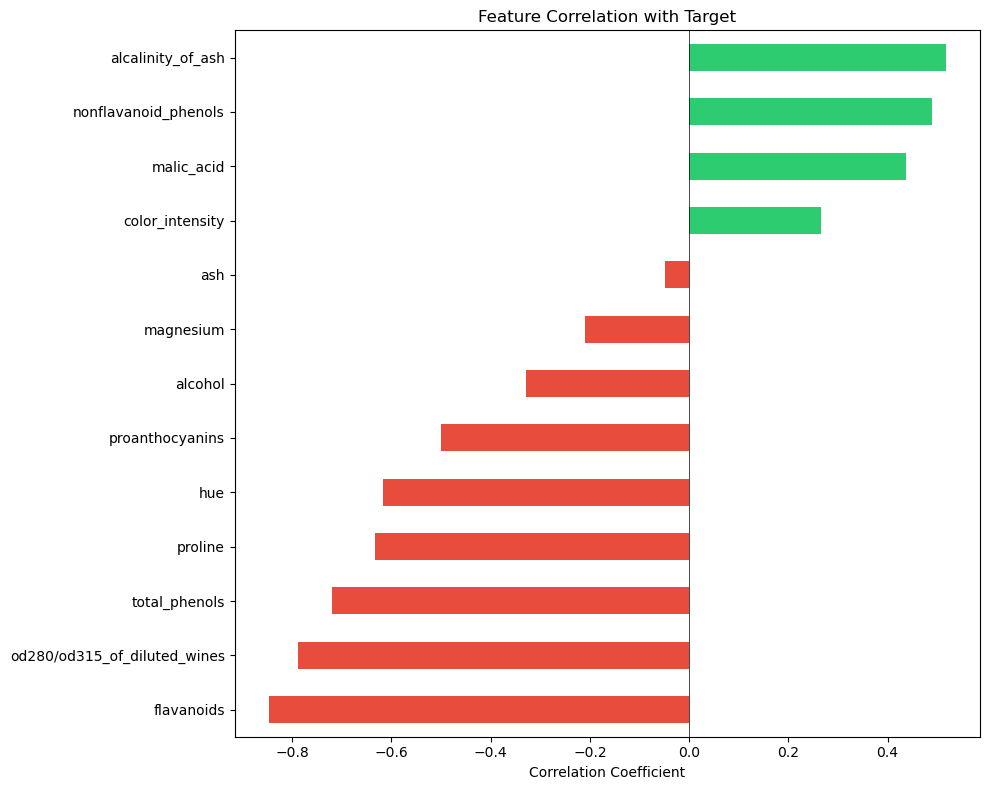

In [13]:
# Correlation with target
correlations = df.corr()['target'].drop('target').sort_values()

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in correlations]
correlations.plot(kind='barh', ax=ax, color=colors)
ax.set_title('Feature Correlation with Target', fontsize=12)
ax.set_xlabel('Correlation Coefficient')
ax.axvline(x=0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()

### Pairplot of Top Features

Top 4 features by correlation: ['flavanoids', 'od280/od315_of_diluted_wines', 'total_phenols', 'proline']


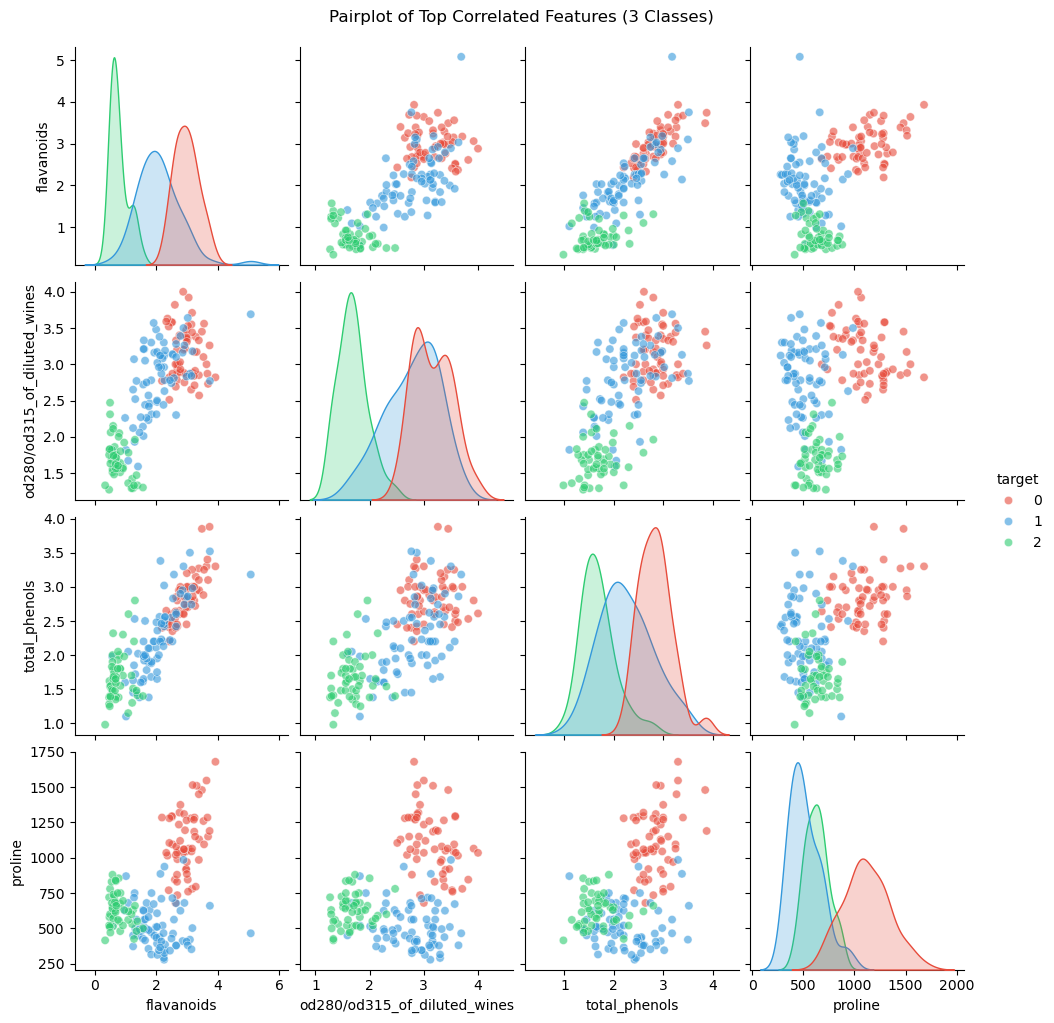

In [14]:
# Select top 4 correlated features (by absolute value)
top_features = correlations.abs().sort_values(ascending=False).head(4).index.tolist()
print(f"Top 4 features by correlation: {top_features}")

sns.pairplot(df[top_features + ['target']], hue='target', 
             palette=['#e74c3c', '#3498db', '#2ecc71'],
             plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Top Correlated Features (3 Classes)', y=1.02)
plt.show()

### 2D Scatter Plots

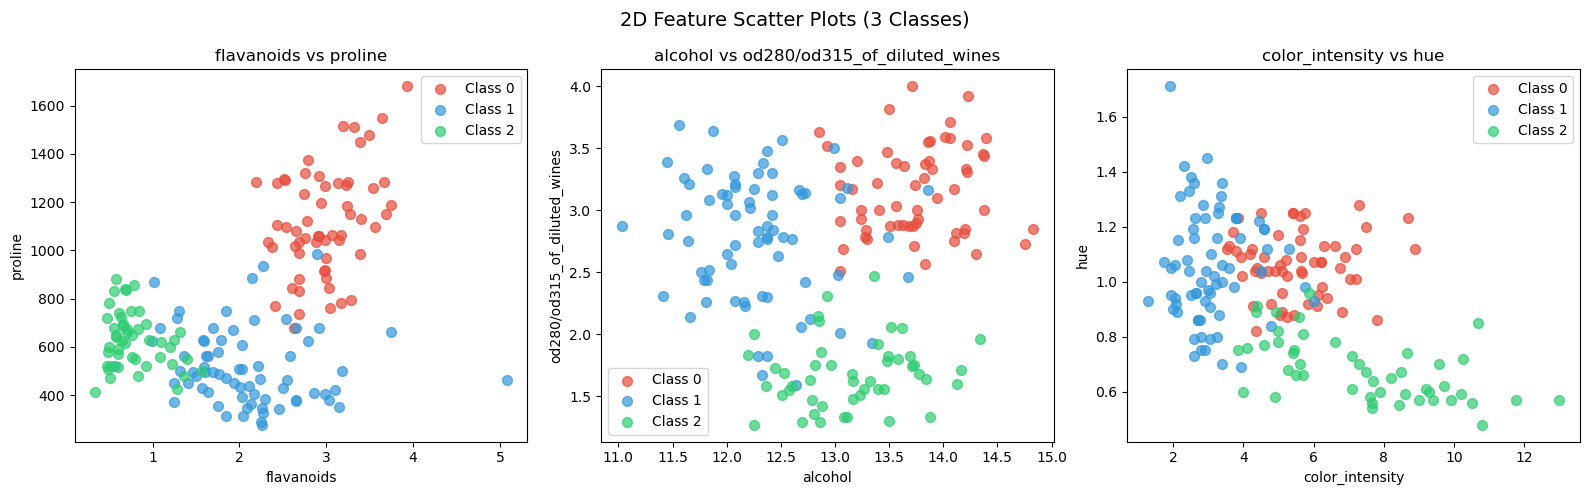

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Best feature pairs for visualization
feature_pairs = [
    ('flavanoids', 'proline'),
    ('alcohol', 'od280/od315_of_diluted_wines'),
    ('color_intensity', 'hue')
]

colors = ['#e74c3c', '#3498db', '#2ecc71']

for idx, (feat1, feat2) in enumerate(feature_pairs):
    for class_val in range(3):
        subset = df[df['target'] == class_val]
        axes[idx].scatter(subset[feat1], subset[feat2], 
                         c=colors[class_val], label=f'Class {class_val}',
                         alpha=0.7, s=50)
    axes[idx].set_xlabel(feat1)
    axes[idx].set_ylabel(feat2)
    axes[idx].legend()
    axes[idx].set_title(f'{feat1} vs {feat2}')

plt.suptitle('2D Feature Scatter Plots (3 Classes)', fontsize=14)
plt.tight_layout()
plt.show()

## Feature Engineering

### Identifying Highly Correlated Features

In [16]:
def find_high_correlations(dataframe, threshold=0.8):
    corr_matrix = dataframe.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    high_corr_pairs = []
    
    for column in upper_tri.columns:
        for index in upper_tri.index:
            if upper_tri.loc[index, column] > threshold:
                high_corr_pairs.append((index, column, upper_tri.loc[index, column]))
    
    return pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

high_corr = find_high_correlations(df.drop('target', axis=1), threshold=0.8)
print(f"Found {len(high_corr)} highly correlated feature pairs (|r| > 0.8):")
high_corr.sort_values('Correlation', ascending=False)

Found 1 highly correlated feature pairs (|r| > 0.8):


,Feature 1,Feature 2,Correlation
0,total_phenols,flavanoids,0.864564


## Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"\nTraining target distribution:")
print(y_train.value_counts().sort_index())
print(f"\nTest target distribution:")
print(y_test.value_counts().sort_index())

Training set size: 142
Test set size: 36

Training target distribution:
target
0    47
1    57
2    38
Name: count, dtype: int64

Test target distribution:
target
0    12
1    14
2    10
Name: count, dtype: int64


## Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Scaled features sample:")
X_train_scaled.head()

Scaled features sample:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
36,0.385801,-0.637871,1.776668,-1.224532,0.696430,0.526865,0.732292,-0.169549,-0.415783,-0.167467,0.624378,0.252908,0.467725
30,0.948519,-0.765445,1.253174,0.853284,0.091785,1.172795,1.333181,-0.590457,1.349742,0.305303,1.067155,0.151048,1.815768
26,0.523354,-0.519409,0.954034,-1.046433,-0.445678,0.930572,1.006382,-0.169549,-0.260002,-0.081509,-0.128343,0.893172,1.516203
12,0.973529,-0.555859,0.168793,-1.076116,-0.714409,0.526865,0.816627,-0.590457,0.363125,0.262324,0.890044,0.427526,1.932265
148,0.435820,0.820120,0.056615,0.556453,-0.512860,-0.555068,-1.291756,0.756449,-0.606183,1.474335,-1.766619,-1.435059,-0.297831


## Principal Component Analysis (PCA)

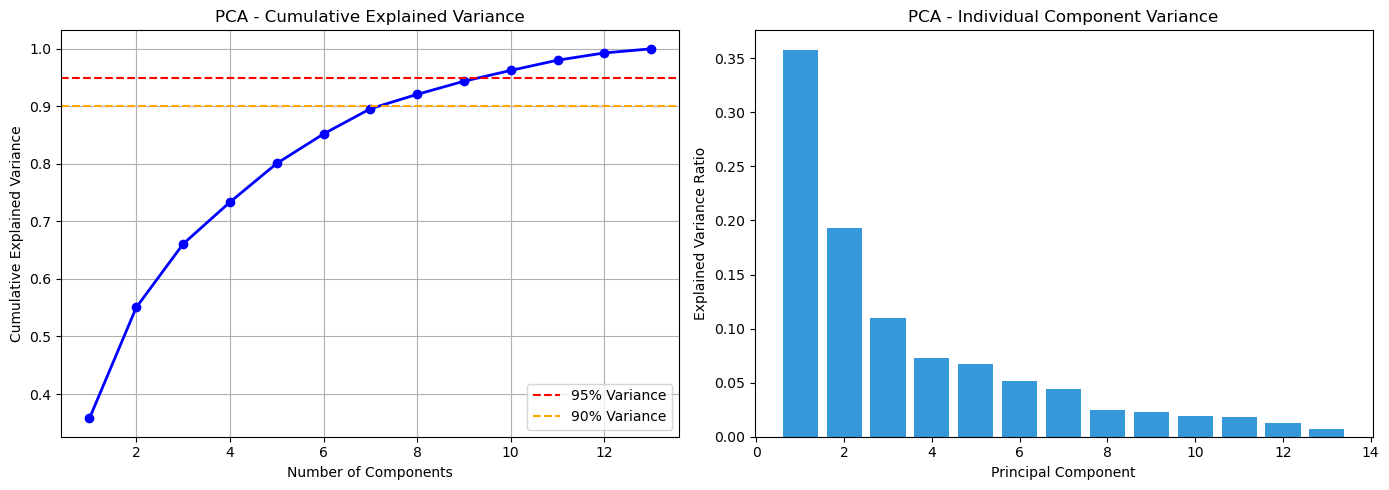

Components for 90% variance: 8
Components for 95% variance: 10


In [19]:
from sklearn.decomposition import PCA

# Fit PCA to see explained variance
pca_full = PCA()
pca_full.fit(X_train_scaled)

# Plot cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Cumulative variance
ax[0].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-', linewidth=2)
ax[0].axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
ax[0].axhline(y=0.90, color='orange', linestyle='--', label='90% Variance')
ax[0].set_xlabel('Number of Components')
ax[0].set_ylabel('Cumulative Explained Variance')
ax[0].set_title('PCA - Cumulative Explained Variance')
ax[0].legend()
ax[0].grid(True)

# Individual variance
ax[1].bar(range(1, len(pca_full.explained_variance_ratio_) + 1), 
          pca_full.explained_variance_ratio_, color='#3498db')
ax[1].set_xlabel('Principal Component')
ax[1].set_ylabel('Explained Variance Ratio')
ax[1].set_title('PCA - Individual Component Variance')

plt.tight_layout()
plt.show()

# Find number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Components for 90% variance: {n_components_90}")
print(f"Components for 95% variance: {n_components_95}")

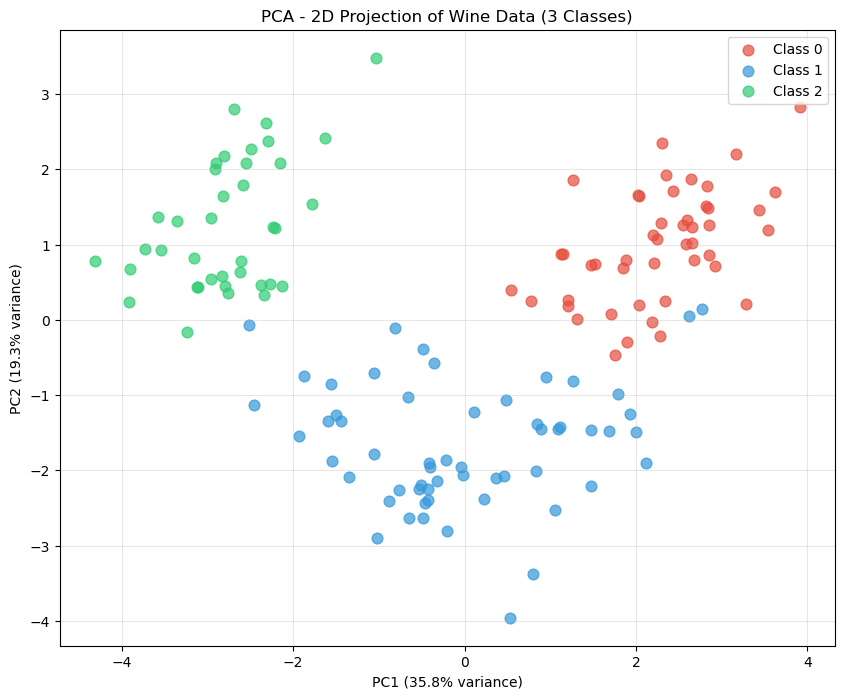

In [20]:
# 2D PCA visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 8))
colors = ['#e74c3c', '#3498db', '#2ecc71']

for class_val in range(3):
    mask = y_train.values == class_val
    plt.scatter(X_pca_2d[mask, 0], X_pca_2d[mask, 1], 
               c=colors[class_val], label=f'Class {class_val}',
               alpha=0.7, s=60)

plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.title('PCA - 2D Projection of Wine Data (3 Classes)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

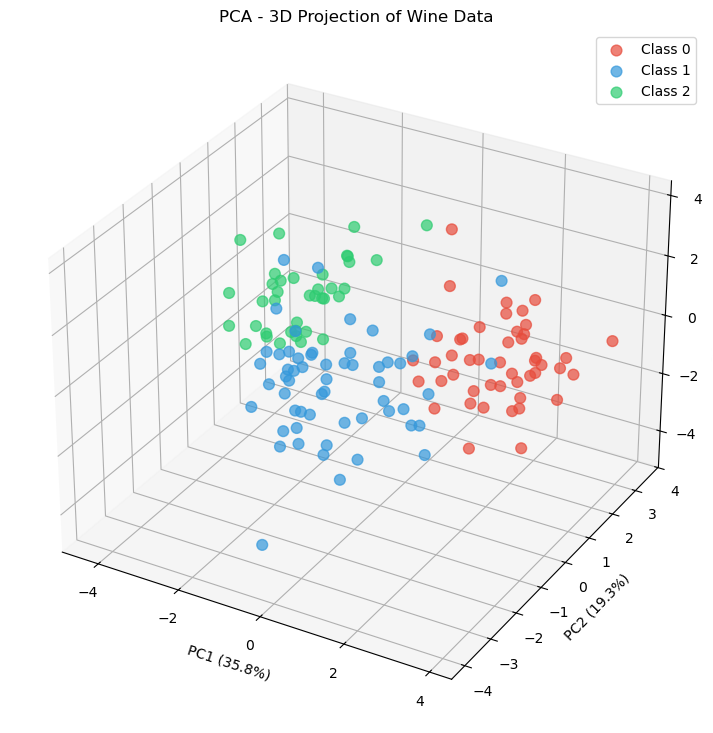

Total variance explained by 3 components: 66.1%


In [21]:
# 3D PCA visualization
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_train_scaled)

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

for class_val in range(3):
    mask = y_train.values == class_val
    ax.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 1], X_pca_3d[mask, 2],
              c=colors[class_val], label=f'Class {class_val}',
              alpha=0.7, s=60)

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]*100:.1f}%)')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]*100:.1f}%)')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]*100:.1f}%)')
ax.set_title('PCA - 3D Projection of Wine Data')
ax.legend()
plt.show()

print(f"Total variance explained by 3 components: {sum(pca_3d.explained_variance_ratio_)*100:.1f}%")

## Model Training

### Multiclass Classification Metrics

For multiclass problems, we use:
- **Macro Average**: Unweighted mean of metrics for each class
- **Weighted Average**: Weighted mean based on class support
- **ROC AUC**: One-vs-Rest (OvR) strategy

### Baseline Model - Logistic Regression (Multiclass)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train baseline model (multinomial for multiclass)
log_reg = LogisticRegression(random_state=42, max_iter=1000, multi_class='multinomial')
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)

print("Baseline Model: Logistic Regression (Multinomial)")
print("=" * 50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2']))

Baseline Model: Logistic Regression (Multinomial)
Accuracy: 0.9722

Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        12
     Class 1       0.93      1.00      0.97        14
     Class 2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



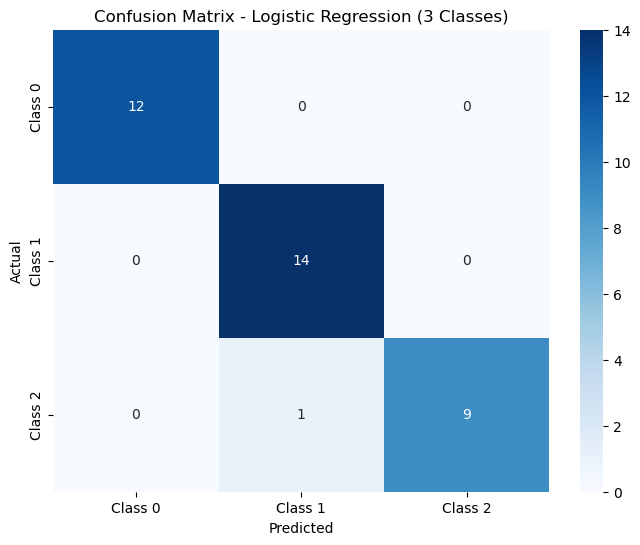

In [23]:
# Confusion Matrix (3x3 for multiclass)
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1', 'Class 2'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix - Logistic Regression (3 Classes)', fontsize=12)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Multi-Model Comparison

Custom Classifier class adapted for **Multiclass Classification**.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score)
import time


class MultiClassifier:
    """
    A class for training and comparing multiple classifiers on multiclass problems.
    
    Key differences from binary classification:
    - Uses 'macro' averaging for precision, recall, F1
    - Uses One-vs-Rest (OvR) strategy for ROC AUC
    - Handles 3+ classes properly
    """
    
    def __init__(self, models=None, param_grids=None, use_gridsearch=False, n_classes=3):
        self.n_classes = n_classes
        
        if models is None:
            self.models = {
                'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000, multi_class='multinomial'),
                'DecisionTree': DecisionTreeClassifier(random_state=42),
                'RandomForest': RandomForestClassifier(random_state=42),
                'GradientBoosting': GradientBoostingClassifier(random_state=42),
                'SVM': SVC(random_state=42, probability=True, decision_function_shape='ovr'),
                'KNeighbors': KNeighborsClassifier(),
                'NaiveBayes': GaussianNB(),
                'AdaBoost': AdaBoostClassifier(random_state=42, algorithm='SAMME')
            }
        else:
            self.models = models
        
        self.default_param_grids = {
            'LogisticRegression': {'C': [0.1, 1.0, 10.0]},
            'DecisionTree': {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10]},
            'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]},
            'GradientBoosting': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 0.2]},
            'SVM': {'C': [0.1, 1.0, 10.0], 'kernel': ['rbf', 'linear']},
            'KNeighbors': {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']},
            'NaiveBayes': {},
            'AdaBoost': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1.0]}
        }
        
        self.param_grids = param_grids if param_grids else self.default_param_grids
        self.use_gridsearch = use_gridsearch
        self.fitted_models = {}
        self.best_model_params = {}
    
    def run(self, X_train, y_train, X_test, y_test):
        results = []
        
        for name, model in self.models.items():
            print(f"\nFitting {name}...")
            start_time = time.time()
            
            if self.use_gridsearch and name in self.param_grids and self.param_grids[name]:
                grid_search = GridSearchCV(
                    model, 
                    self.param_grids[name], 
                    cv=5, 
                    scoring='accuracy',
                    n_jobs=-1
                )
                grid_search.fit(X_train, y_train)
                best_model = grid_search.best_estimator_
                self.best_model_params[name] = grid_search.best_params_
            else:
                best_model = model
                best_model.fit(X_train, y_train)
            
            elapsed_time = time.time() - start_time
            print(f"{name} trained in {elapsed_time:.2f}s")
            
            self.fitted_models[name] = best_model
            
            # Training metrics
            y_train_pred = best_model.predict(X_train)
            train_accuracy = accuracy_score(y_train, y_train_pred)
            train_f1_macro = f1_score(y_train, y_train_pred, average='macro')
            
            # Test metrics (using macro averaging for multiclass)
            y_test_pred = best_model.predict(X_test)
            test_accuracy = accuracy_score(y_test, y_test_pred)
            test_precision_macro = precision_score(y_test, y_test_pred, average='macro')
            test_recall_macro = recall_score(y_test, y_test_pred, average='macro')
            test_f1_macro = f1_score(y_test, y_test_pred, average='macro')
            test_f1_weighted = f1_score(y_test, y_test_pred, average='weighted')
            
            # ROC AUC (One-vs-Rest for multiclass)
            if hasattr(best_model, 'predict_proba'):
                y_proba = best_model.predict_proba(X_test)
                test_roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
            else:
                test_roc_auc = np.nan
            
            results.append({
                'Model': name,
                'Accuracy_Train': train_accuracy,
                'Accuracy_Test': test_accuracy,
                'Precision_Macro': test_precision_macro,
                'Recall_Macro': test_recall_macro,
                'F1_Train_Macro': train_f1_macro,
                'F1_Test_Macro': test_f1_macro,
                'F1_Test_Weighted': test_f1_weighted,
                'ROC_AUC_OvR': test_roc_auc,
                'Time_s': elapsed_time
            })
        
        results_df = pd.DataFrame(results)
        results_df.set_index('Model', inplace=True)
        return results_df

### Training with Default Parameters

In [25]:
classifier_default = MultiClassifier(use_gridsearch=False, n_classes=3)
results_default = classifier_default.run(X_train_scaled, y_train, X_test_scaled, y_test)
results_default.sort_values('F1_Test_Macro', ascending=False)


Fitting LogisticRegression...
LogisticRegression trained in 0.00s

Fitting DecisionTree...
DecisionTree trained in 0.00s

Fitting RandomForest...
RandomForest trained in 0.13s

Fitting GradientBoosting...
GradientBoosting trained in 0.42s

Fitting SVM...
SVM trained in 0.01s

Fitting KNeighbors...
KNeighbors trained in 0.15s

Fitting NaiveBayes...
NaiveBayes trained in 0.00s

Fitting AdaBoost...
AdaBoost trained in 0.07s


,Accuracy_Train,Accuracy_Test,Precision_Macro,Recall_Macro,F1_Train_Macro,F1_Test_Macro,F1_Test_Weighted,ROC_AUC_OvR,Time_s
Model,,,,,,,,,
RandomForest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.125207
NaiveBayes,0.978873,0.972222,0.974359,0.976190,0.979019,0.974321,0.972263,1.000000,0.001325
KNeighbors,0.978873,0.972222,0.969697,0.976190,0.978935,0.971781,0.972369,0.998818,0.147361
LogisticRegression,1.000000,0.972222,0.977778,0.966667,1.000000,0.970962,0.971970,1.000000,0.004451
SVM,0.992958,0.972222,0.977778,0.966667,0.992721,0.970962,0.971970,1.000000,0.005548
DecisionTree,1.000000,0.944444,0.958333,0.938889,1.000000,0.945741,0.944961,0.954293,0.002152
GradientBoosting,1.000000,0.944444,0.950549,0.942857,1.000000,0.945313,0.944269,0.997835,0.422000
AdaBoost,1.000000,0.916667,0.926740,0.919048,1.000000,0.919778,0.916529,0.997835,0.073346


### Training with GridSearchCV

In [26]:
classifier_grid = MultiClassifier(use_gridsearch=True, n_classes=3)
results_grid = classifier_grid.run(X_train_scaled, y_train, X_test_scaled, y_test)
results_grid.sort_values('F1_Test_Macro', ascending=False)


Fitting LogisticRegression...
LogisticRegression trained in 5.89s

Fitting DecisionTree...
DecisionTree trained in 0.18s

Fitting RandomForest...
RandomForest trained in 1.39s

Fitting GradientBoosting...
GradientBoosting trained in 1.50s

Fitting SVM...
SVM trained in 0.07s

Fitting KNeighbors...
KNeighbors trained in 0.36s

Fitting NaiveBayes...
NaiveBayes trained in 0.00s

Fitting AdaBoost...
AdaBoost trained in 0.71s


,Accuracy_Train,Accuracy_Test,Precision_Macro,Recall_Macro,F1_Train_Macro,F1_Test_Macro,F1_Test_Weighted,ROC_AUC_OvR,Time_s
Model,,,,,,,,,
LogisticRegression,0.992958,1.000000,1.000000,1.000000,0.992721,1.000000,1.000000,1.000000,5.885859
RandomForest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.385997
KNeighbors,0.964789,1.000000,1.000000,1.000000,0.965107,1.000000,1.000000,1.000000,0.359031
NaiveBayes,0.978873,0.972222,0.974359,0.976190,0.979019,0.974321,0.972263,1.000000,0.001390
SVM,0.992958,0.972222,0.977778,0.966667,0.992721,0.970962,0.971970,1.000000,0.065282
DecisionTree,0.992958,0.944444,0.958333,0.938889,0.993517,0.945741,0.944961,0.949310,0.184920
GradientBoosting,1.000000,0.944444,0.950549,0.942857,1.000000,0.945313,0.944269,0.997835,1.502771
AdaBoost,1.000000,0.916667,0.926740,0.919048,1.000000,0.919778,0.916529,0.997835,0.713869


In [27]:
print("Best Parameters from GridSearch:")
print("=" * 50)
for model, params in classifier_grid.best_model_params.items():
    print(f"{model}: {params}")

Best Parameters from GridSearch:
LogisticRegression: {'C': 0.1}
DecisionTree: {'max_depth': None, 'min_samples_split': 10}
RandomForest: {'max_depth': None, 'n_estimators': 50}
GradientBoosting: {'learning_rate': 0.1, 'n_estimators': 100}
SVM: {'C': 0.1, 'kernel': 'linear'}
KNeighbors: {'n_neighbors': 7, 'weights': 'uniform'}
AdaBoost: {'learning_rate': 1.0, 'n_estimators': 50}


### Model Comparison Visualization

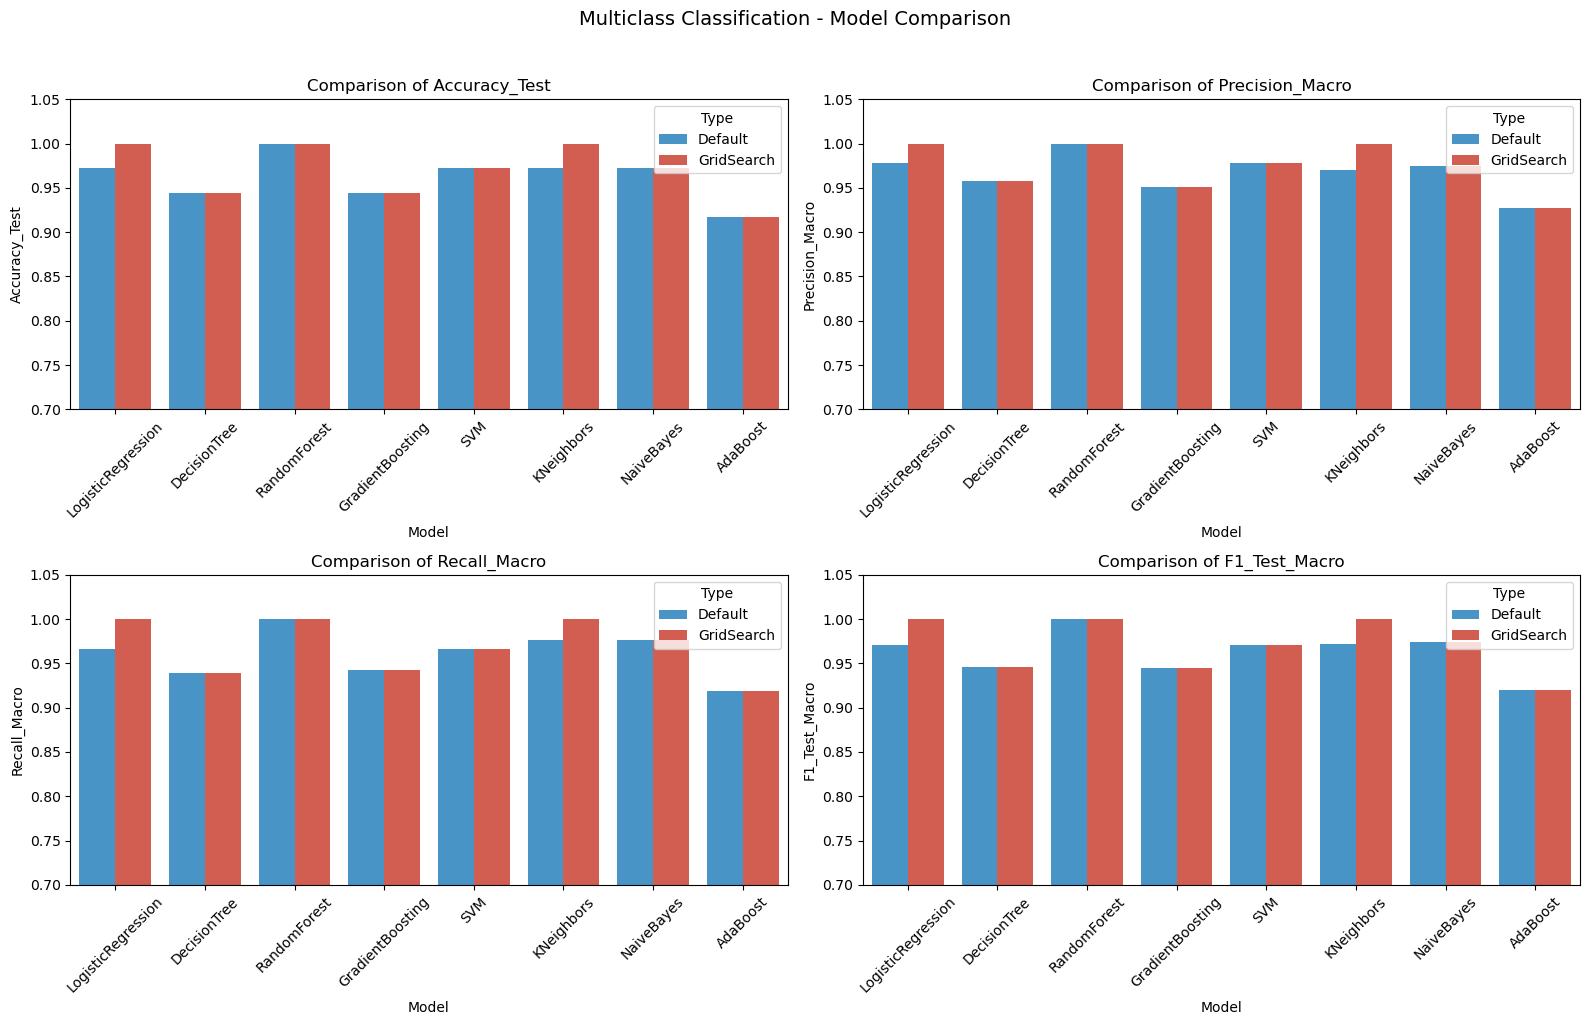

In [28]:
# Prepare data for comparison
results_default_copy = results_default.copy()
results_default_copy['Type'] = 'Default'

results_grid_copy = results_grid.copy()
results_grid_copy['Type'] = 'GridSearch'

combined_df = pd.concat([results_default_copy, results_grid_copy], axis=0)
combined_df.reset_index(inplace=True)

metrics = ['Accuracy_Test', 'Precision_Macro', 'Recall_Macro', 'F1_Test_Macro']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for ax, metric in zip(axes, metrics):
    sns.barplot(data=combined_df, x='Model', y=metric, hue='Type', ax=ax, 
                palette=['#3498db', '#e74c3c'])
    ax.set_title(f'Comparison of {metric}')
    ax.set_ylabel(metric)
    ax.set_xlabel('Model')
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(0.7, 1.05)

plt.suptitle('Multiclass Classification - Model Comparison', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

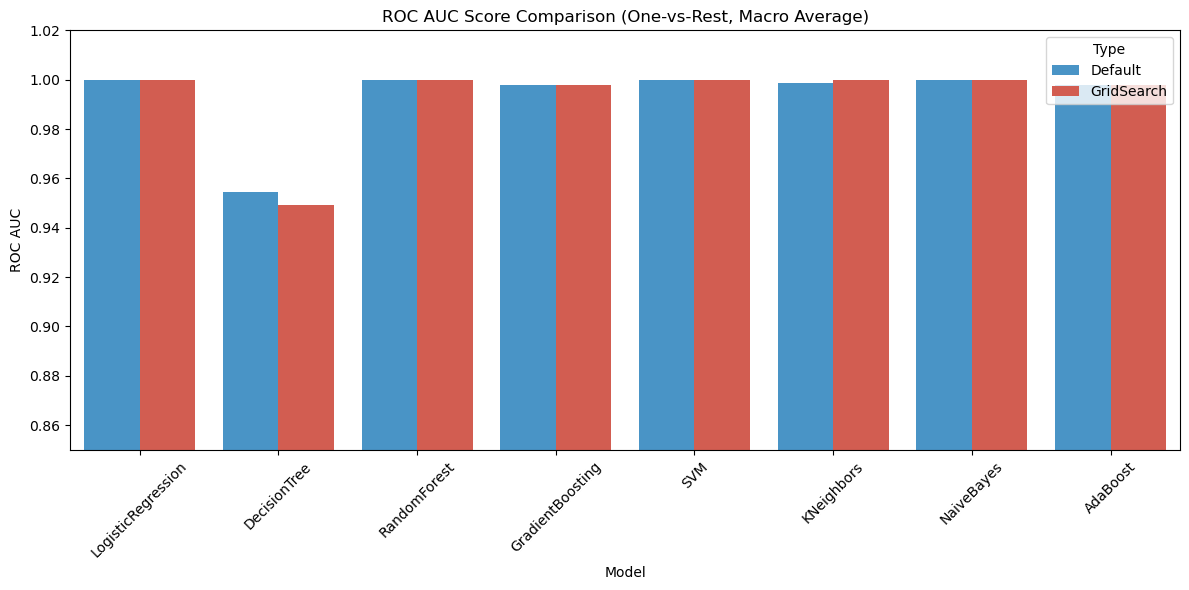

In [29]:
# ROC AUC Comparison (One-vs-Rest)
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_df, x='Model', y='ROC_AUC_OvR', hue='Type', 
            palette=['#3498db', '#e74c3c'])
plt.title('ROC AUC Score Comparison (One-vs-Rest, Macro Average)', fontsize=12)
plt.ylabel('ROC AUC')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0.85, 1.02)
plt.tight_layout()
plt.show()

## Best Model Analysis

In [30]:
# Find best model based on F1 Macro score
best_model_name = results_grid['F1_Test_Macro'].idxmax()
best_model = classifier_grid.fitted_models[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"Best Parameters: {classifier_grid.best_model_params.get(best_model_name, 'Default')}")
print(f"\nTest Metrics:")
print(results_grid.loc[best_model_name])

Best Model: LogisticRegression
Best Parameters: {'C': 0.1}

Test Metrics:
Accuracy_Train      0.992958
Accuracy_Test       1.000000
Precision_Macro     1.000000
Recall_Macro        1.000000
F1_Train_Macro      0.992721
F1_Test_Macro       1.000000
F1_Test_Weighted    1.000000
ROC_AUC_OvR         1.000000
Time_s              5.885859
Name: LogisticRegression, dtype: float64


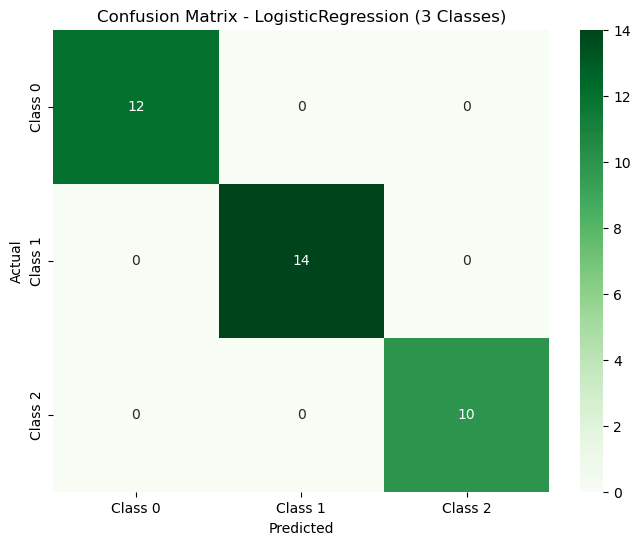


Classification Report - LogisticRegression:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        12
     Class 1       1.00      1.00      1.00        14
     Class 2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [31]:
# Confusion Matrix for best model (3x3)
y_pred_best = best_model.predict(X_test_scaled)

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Class 0', 'Class 1', 'Class 2'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title(f'Confusion Matrix - {best_model_name} (3 Classes)', fontsize=12)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"\nClassification Report - {best_model_name}:")
print(classification_report(y_test, y_pred_best, 
                           target_names=['Class 0', 'Class 1', 'Class 2']))

### Per-Class Performance Analysis

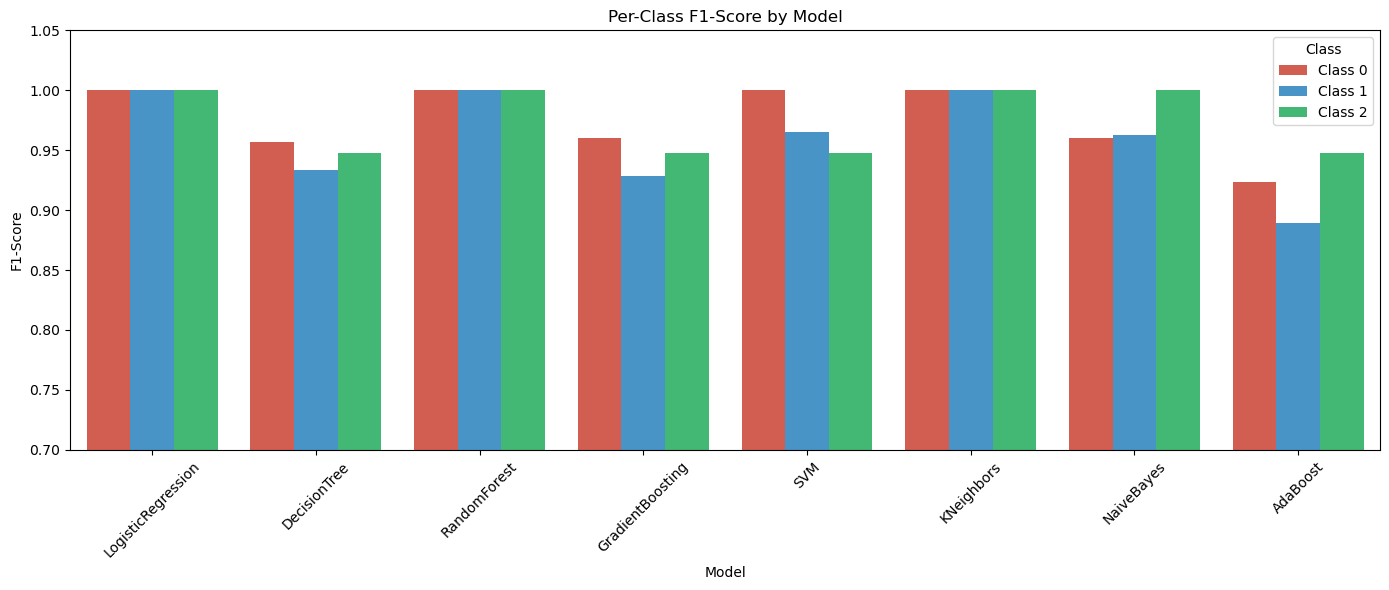

In [32]:
from sklearn.metrics import precision_recall_fscore_support

# Get per-class metrics for all models
per_class_results = []

for name, model in classifier_grid.fitted_models.items():
    y_pred = model.predict(X_test_scaled)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)
    
    for class_idx in range(3):
        per_class_results.append({
            'Model': name,
            'Class': f'Class {class_idx}',
            'Precision': precision[class_idx],
            'Recall': recall[class_idx],
            'F1-Score': f1[class_idx],
            'Support': support[class_idx]
        })

per_class_df = pd.DataFrame(per_class_results)

# Visualize per-class F1 scores
plt.figure(figsize=(14, 6))
sns.barplot(data=per_class_df, x='Model', y='F1-Score', hue='Class',
            palette=['#e74c3c', '#3498db', '#2ecc71'])
plt.title('Per-Class F1-Score by Model', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0.7, 1.05)
plt.legend(title='Class')
plt.tight_layout()
plt.show()

### ROC Curves (One-vs-Rest)

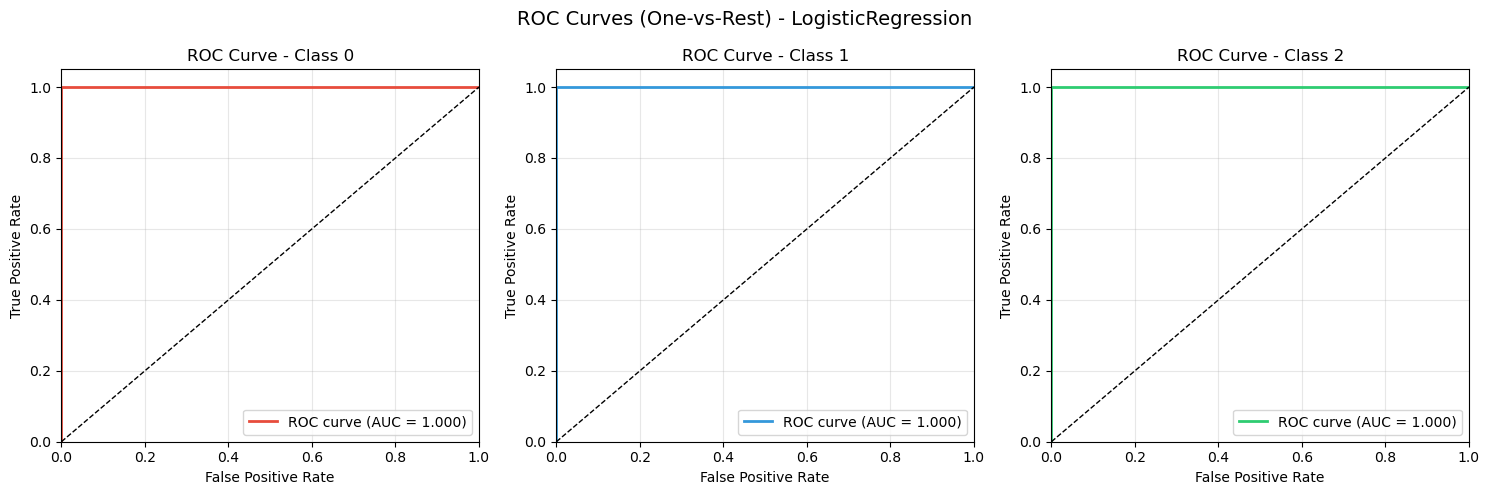

In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = 3

# Plot ROC curves for best model
if hasattr(best_model, 'predict_proba'):
    y_proba = best_model.predict_proba(X_test_scaled)
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    colors = ['#e74c3c', '#3498db', '#2ecc71']
    
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc = auc(fpr, tpr)
        
        axes[i].plot(fpr, tpr, color=colors[i], linewidth=2,
                    label=f'ROC curve (AUC = {roc_auc:.3f})')
        axes[i].plot([0, 1], [0, 1], 'k--', linewidth=1)
        axes[i].set_xlim([0.0, 1.0])
        axes[i].set_ylim([0.0, 1.05])
        axes[i].set_xlabel('False Positive Rate')
        axes[i].set_ylabel('True Positive Rate')
        axes[i].set_title(f'ROC Curve - Class {i}')
        axes[i].legend(loc='lower right')
        axes[i].grid(True, alpha=0.3)
    
    plt.suptitle(f'ROC Curves (One-vs-Rest) - {best_model_name}', fontsize=14)
    plt.tight_layout()
    plt.show()

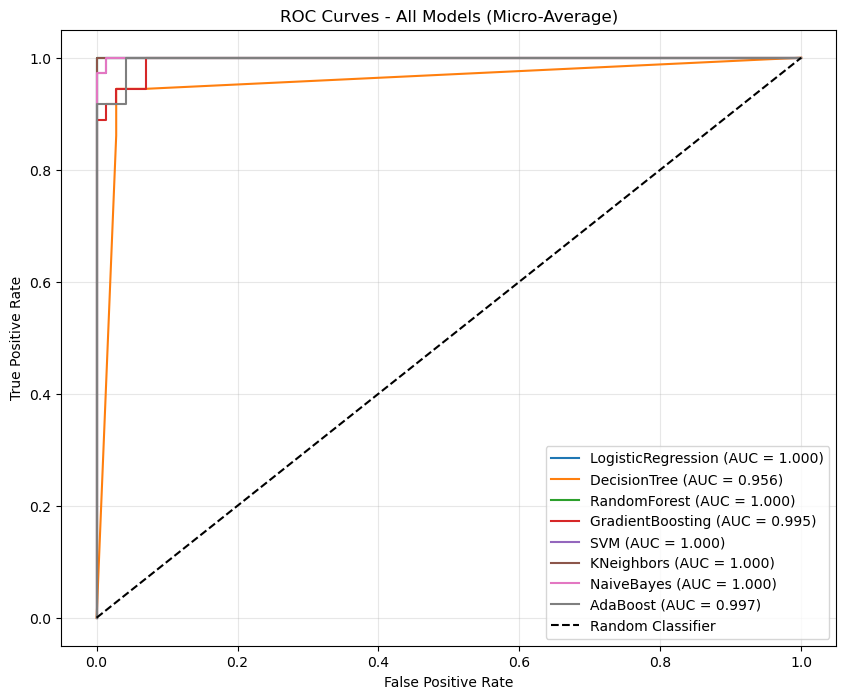

In [34]:
# Combined ROC curves for all models (macro-averaged)
plt.figure(figsize=(10, 8))

for name, model in classifier_grid.fitted_models.items():
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test_scaled)
        
        # Compute macro-averaged ROC curve
        fpr_all = []
        tpr_all = []
        
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            fpr_all.append(fpr)
            tpr_all.append(tpr)
        
        # Use micro-average for plotting
        fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
        roc_auc = auc(fpr_micro, tpr_micro)
        
        plt.plot(fpr_micro, tpr_micro, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Models (Micro-Average)', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

### Feature Importance

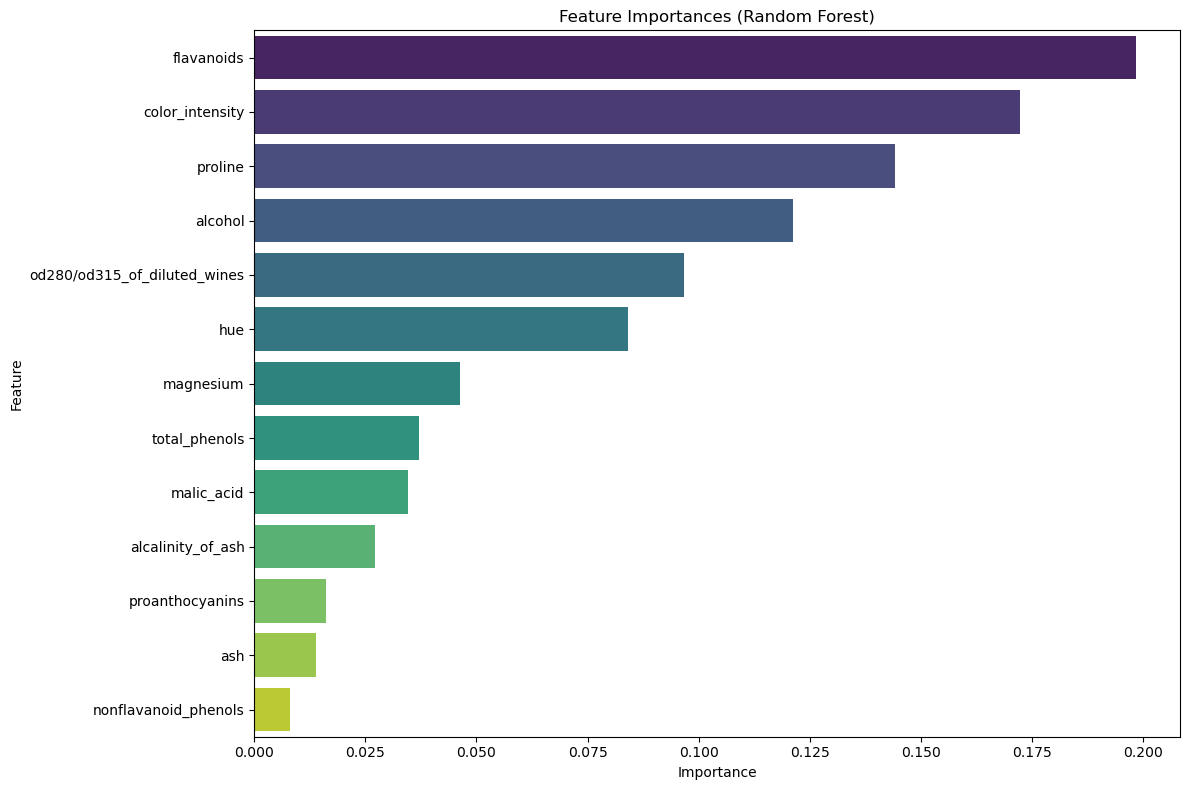


Top 5 Most Important Features:
                         Feature  Importance
6                     flavanoids    0.198375
9                color_intensity    0.172235
12                       proline    0.144254
0                        alcohol    0.121256
11  od280/od315_of_diluted_wines    0.096693


In [35]:
# Feature importance from Random Forest
if 'RandomForest' in classifier_grid.fitted_models:
    rf_model = classifier_grid.fitted_models['RandomForest']
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(data=feature_importance, x='Importance', y='Feature', 
                palette='viridis')
    plt.title('Feature Importances (Random Forest)', fontsize=12)
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()
    
    print("\nTop 5 Most Important Features:")
    print(feature_importance.head())

### Decision Boundary Visualization (2D PCA)

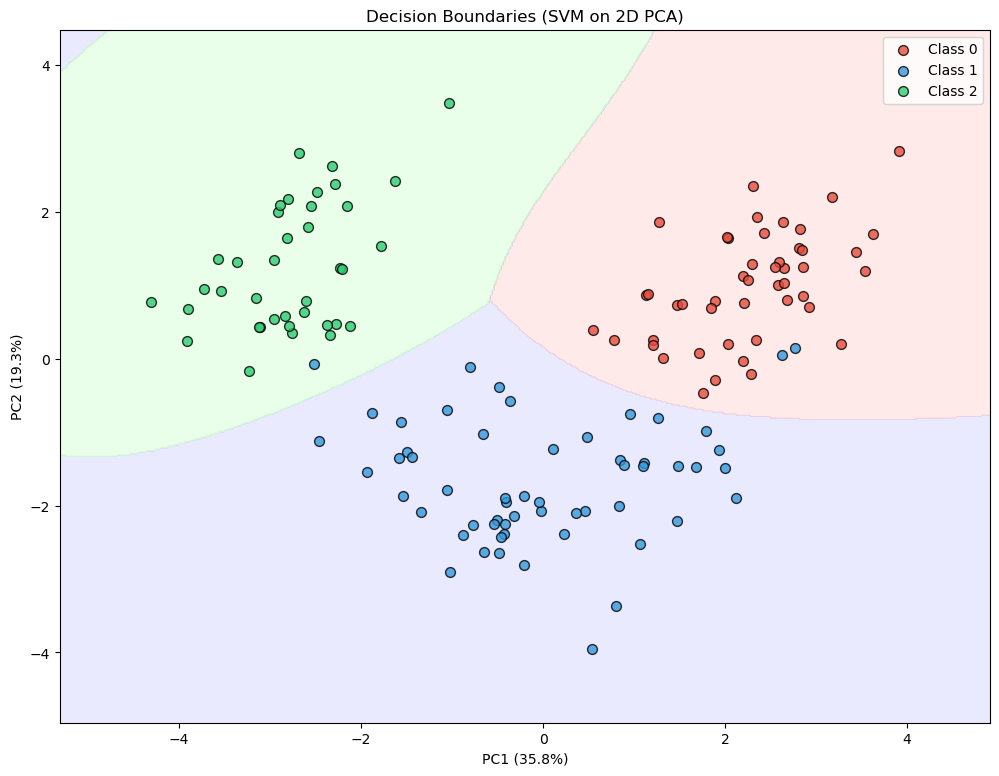

SVM Accuracy on 2D PCA data: 0.9444


In [36]:
from matplotlib.colors import ListedColormap

# Transform data to 2D using PCA
pca_2d = PCA(n_components=2)
X_train_2d = pca_2d.fit_transform(X_train_scaled)
X_test_2d = pca_2d.transform(X_test_scaled)

# Train a model on 2D data for visualization
from sklearn.svm import SVC
svm_2d = SVC(kernel='rbf', C=1.0, probability=True)
svm_2d.fit(X_train_2d, y_train)

# Create mesh grid
h = 0.02
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on mesh
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(12, 9))
cmap_light = ListedColormap(['#ffcccc', '#ccccff', '#ccffcc'])
cmap_bold = ListedColormap(['#e74c3c', '#3498db', '#2ecc71'])

plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)

# Plot training points
for class_val, color in zip([0, 1, 2], ['#e74c3c', '#3498db', '#2ecc71']):
    mask = y_train.values == class_val
    plt.scatter(X_train_2d[mask, 0], X_train_2d[mask, 1], 
               c=color, label=f'Class {class_val}', edgecolor='black',
               s=50, alpha=0.8)

plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('Decision Boundaries (SVM on 2D PCA)', fontsize=12)
plt.legend()
plt.show()

# Accuracy on 2D data
acc_2d = accuracy_score(y_test, svm_2d.predict(X_test_2d))
print(f"SVM Accuracy on 2D PCA data: {acc_2d:.4f}")

## Conclusion

### Key Findings:

1. **Dataset Quality**: The Wine dataset is clean with no missing values and 178 samples across 3 classes.

2. **Class Balance**: Relatively balanced (33.1% / 39.9% / 27.0%).

3. **Feature Separability**: PCA visualization shows good class separation, especially in 2D/3D projections.

4. **Multiclass Metrics**:
   - Used **Macro Averaging** for fair comparison across classes
   - **One-vs-Rest (OvR)** strategy for ROC AUC
   - **Weighted F1** accounts for class imbalance

5. **Model Performance**: Most models achieve >95% accuracy due to well-separated classes.

### Multiclass-Specific Considerations:

| Metric | Description | When to Use |
|--------|-------------|-------------|
| Macro Average | Equal weight to all classes | Balanced importance |
| Weighted Average | Weight by class support | Imbalanced classes |
| ROC AUC (OvR) | One-vs-Rest strategy | Comparing across models |

### Recommendations:

- **Logistic Regression** or **SVM** for interpretability
- **Random Forest** for feature importance insights
- Monitor **per-class performance** to ensure no class is neglected
- For highly imbalanced multiclass problems, consider **stratified sampling** and **class weights**

In [37]:
# Final Summary Table
print("=" * 70)
print("FINAL MODEL COMPARISON - MULTICLASS CLASSIFICATION (GridSearch)")
print("=" * 70)
summary_cols = ['Accuracy_Test', 'Precision_Macro', 'Recall_Macro', 
                'F1_Test_Macro', 'F1_Test_Weighted', 'ROC_AUC_OvR']
print(results_grid[summary_cols].sort_values('F1_Test_Macro', ascending=False).to_string())

FINAL MODEL COMPARISON - MULTICLASS CLASSIFICATION (GridSearch)
                    Accuracy_Test  Precision_Macro  Recall_Macro  F1_Test_Macro  F1_Test_Weighted  ROC_AUC_OvR
Model                                                                                                         
LogisticRegression       1.000000         1.000000      1.000000       1.000000          1.000000     1.000000
RandomForest             1.000000         1.000000      1.000000       1.000000          1.000000     1.000000
KNeighbors               1.000000         1.000000      1.000000       1.000000          1.000000     1.000000
NaiveBayes               0.972222         0.974359      0.976190       0.974321          0.972263     1.000000
SVM                      0.972222         0.977778      0.966667       0.970962          0.971970     1.000000
DecisionTree             0.944444         0.958333      0.938889       0.945741          0.944961     0.949310
GradientBoosting         0.944444         0.9505